In [1]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Please install emoji: pip3 install emoji


In [4]:
def sentiment(row):
    inputs = tokenizer(row['cleaned_text'], return_tensors="pt")
    with torch.no_grad():
        scores = model(**inputs).logits
    predicted_class_id = scores.argmax().item()
    label = model.config.id2label[predicted_class_id]
    row['sentiment'] = label
    return row

[mar] current time:- 2022-06-05 23:25:59.992540


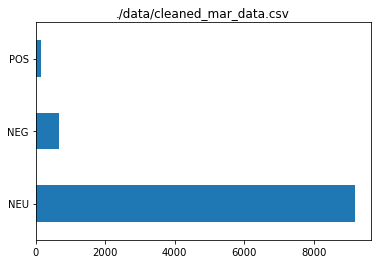

[mar] current time:- 2022-06-05 23:31:37.102658
[apr] current time:- 2022-06-05 23:31:37.102658


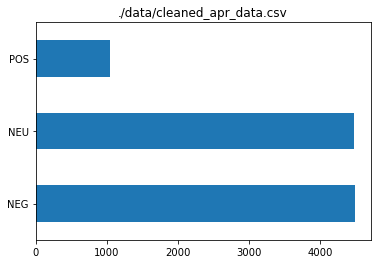

[apr] current time:- 2022-06-05 23:41:29.434692
[may] current time:- 2022-06-05 23:41:29.434692


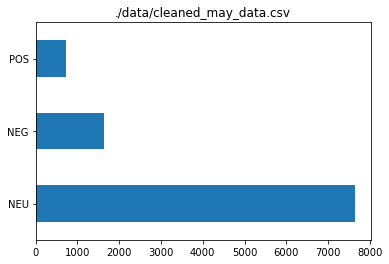

[may] current time:- 2022-06-05 23:48:26.362816


In [5]:
for month in 'mar,apr,may'.split(','):
    ct = datetime.datetime.now()
    print(f"[{month}] current time:-", ct)
    
    file = f'./data/cleaned_{month}_data.csv'

    df = pd.read_csv(file)
    df = df.sample(10000)
    df['cleaned_text'] = df['cleaned_text'].apply(str)
    df = df.apply(lambda x: sentiment(x), axis = 1)
    df["sentiment"].value_counts().plot(kind = 'barh')
    plt.title(file)
    plt.show()
    new_name = file[:-4] +'_with_sentiment' +'.csv'
    df.to_csv(new_name)
    ct = datetime.datetime.now()
    print(f"[{month}] current time:-", ct)